<h2>Data Preprocessing and Augmentation</h2>

The biggest problem in our dataset is class imbalance, to combat this we take the class with the least number of instances (100) and take this many samples from every other class. In total we end up with 700 pictures.

In [4]:
import sys
import os

current_dir = os.getcwd()
path_to_add = os.path.join(current_dir, 'scripts', 'classifiers','utils')
sys.path.append(path_to_add)

from classifiers.utils import load_balanced_data as lb

metadata = lb.load_metadata("HAM10000_metadata.csv") 

image_id_dict = lb.generate_image_id_list(metadata) 

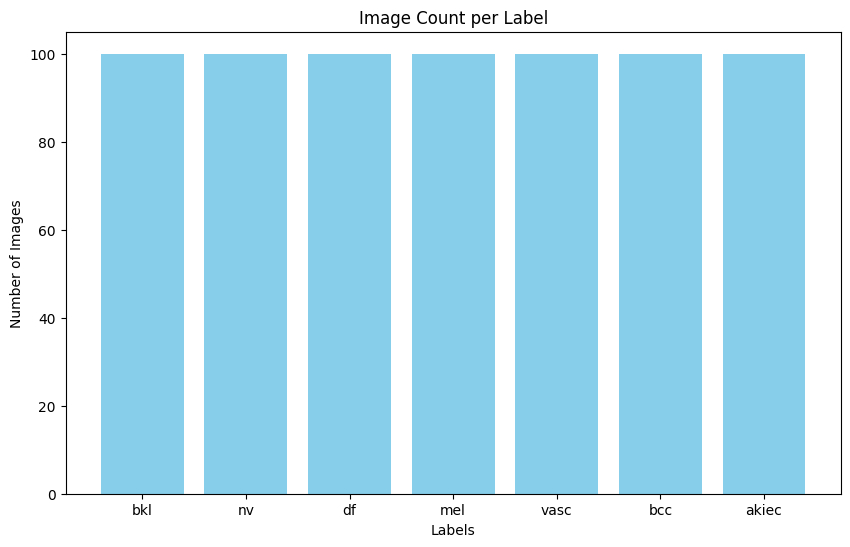

In [5]:
import matplotlib.pyplot as plt


# Calculate the number of images per label
labels = list(image_id_dict.keys())
image_counts = [len(image_ids) for image_ids in image_id_dict.values()]

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(labels, image_counts, color='skyblue')
plt.xlabel('Labels')
plt.ylabel('Number of Images')
plt.title('Image Count per Label')
plt.show()


To create some more samples we use data augmentation, with it we create another 700 pictures ending up with a total of 1400. Here are some examples of how the images look before and after augmentation:

140


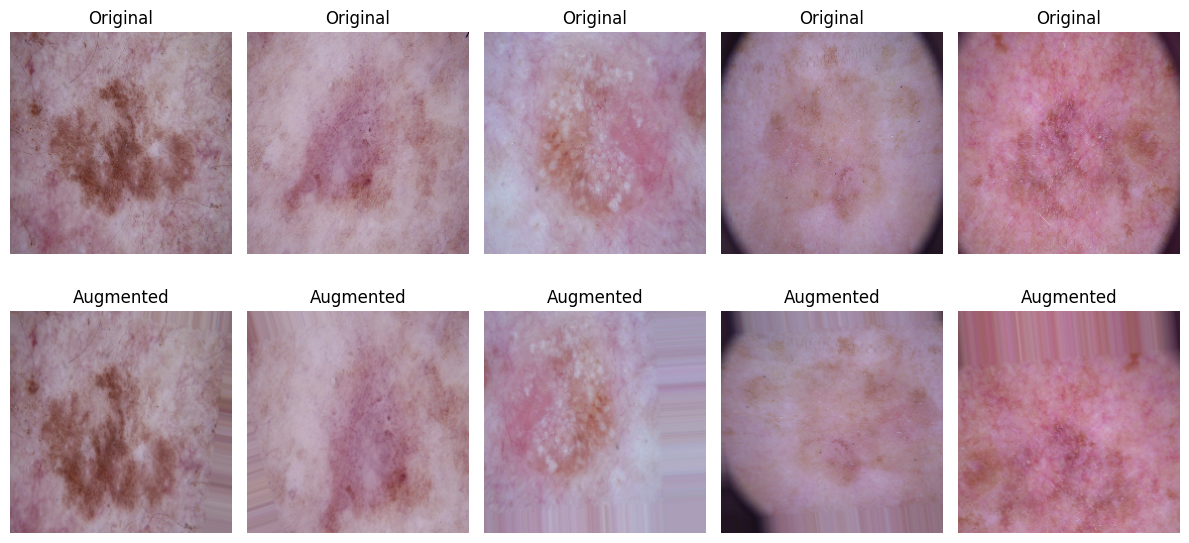

In [17]:
num_samples = 10  
image_id_dict = lb.generate_image_id_list(metadata, num_samples)


image_dir = 'data/HAM10000_images_part_1'
images, labels = lb.load_images_for_augmentation(metadata, image_dir, image_id_dict)

augmented_images, augmented_labels = lb.augment_images(images, labels)
print(len(augmented_labels))
def plot_images(original_images, augmented_images, num_images=5):
    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        plt.subplot(2, num_images, i + 1)
        plt.imshow(original_images[i])
        plt.title('Original')
        plt.axis('off')
        
        plt.subplot(2, num_images, num_images + i + 1)
        
        plt.imshow(augmented_images[i*2])
        plt.title('Augmented')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

images_uint8 = (images * 255).astype('uint8')

plot_images(images_uint8, augmented_images)